Grupo:

HENNY ROCIO CARRILLO
hcarril42467@universidadean.edu.co

WILBER ALEXANDER RODRIGUEZ CASTRO
wrodrig96546@universidadean.edu.co

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [4]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


In [5]:
print(X.dtypes)


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
dtype: object


In [6]:
# Convertir columnas categóricas en variables dummy
X_encoded = pd.get_dummies(X, drop_first=True)

# Verificar la nueva estructura de X
print(X_encoded.head())


   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [7]:
y

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


In [26]:
import pandas as pd

# Supongamos que student_performance ya es un DataFrame cargado
# Separar las características (X) y la variable objetivo (y)
X = student_performance.drop(columns=['G1', 'G2', 'G3'])  # Eliminar G1, G2 y G3 para obtener las características
y = student_performance[['G1', 'G2', 'G3']]  # Tomar G1, G2 y G3 como variable objetivo

# Asegurarse de que X e y tengan el mismo índice
y.reset_index(drop=True, inplace=True)  # Restablecer el índice de y

# Agregar una columna con la suma de G1, G2 y G3
y['Suma_G1_G2_G3'] = y['G1'] + y['G2'] + y['G3']

# Unir X e y
data_combined = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# Mostrar el DataFrame resultante
print(data_combined.head())




  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 Suma_G1_G2_G3  
0        3     4     1     1       3        6   5   6   6            17  
1        3     3     1     1       3        4   5   5   6            16  
2        3     2     2     3       3       10   7   8  10            25  
3        2     2     1     1       5        2  15  14  15            44  
4        3     2     1     2       5        4   6  10  10            26  

[5 rows x 34 columns]


C:\Users\analistaderiesgo1\AppData\Local\Temp\ipykernel_22880\2177869580.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Suma_G1_G2_G3'] = y['G1'] + y['G2'] + y['G3']


In [27]:
# Eliminar filas con valores nulos
data_combined_cleaned = data_combined.dropna()

# Filtrar filas donde G1, G2, G3 estén en un rango razonable (ejemplo: 0-20)
data_combined_cleaned = data_combined_cleaned[
    (data_combined_cleaned['G1'].between(0, 20)) &
    (data_combined_cleaned['G2'].between(0, 20)) &
    (data_combined_cleaned['G3'].between(0, 20))
]

# Mostrar el DataFrame resultante después de la limpieza
print(data_combined_cleaned.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 Suma_G1_G2_G3  
0        3     4     1     1       3        6   5   6   6            17  
1        3     3     1     1       3        4   5   5   6            16  
2        3     2     2     3       3       10   7   8  10            25  
3        2     2     1     1       5        2  15  14  15            44  
4        3     2     1     2       5        4   6  10  10            26  

[5 rows x 34 columns]


In [33]:
# 1. Regresión líneal multipe 

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = lin_reg.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Mostrar coeficientes del modelo
print("Coeficientes del modelo:", lin_reg.coef_)
print("Intersección del modelo:", lin_reg.intercept_)


Error cuadrático medio: 4.2118674966017595
Coeficientes del modelo: [1.16313828 1.99318622]
Intersección del modelo: -2.037049284709017


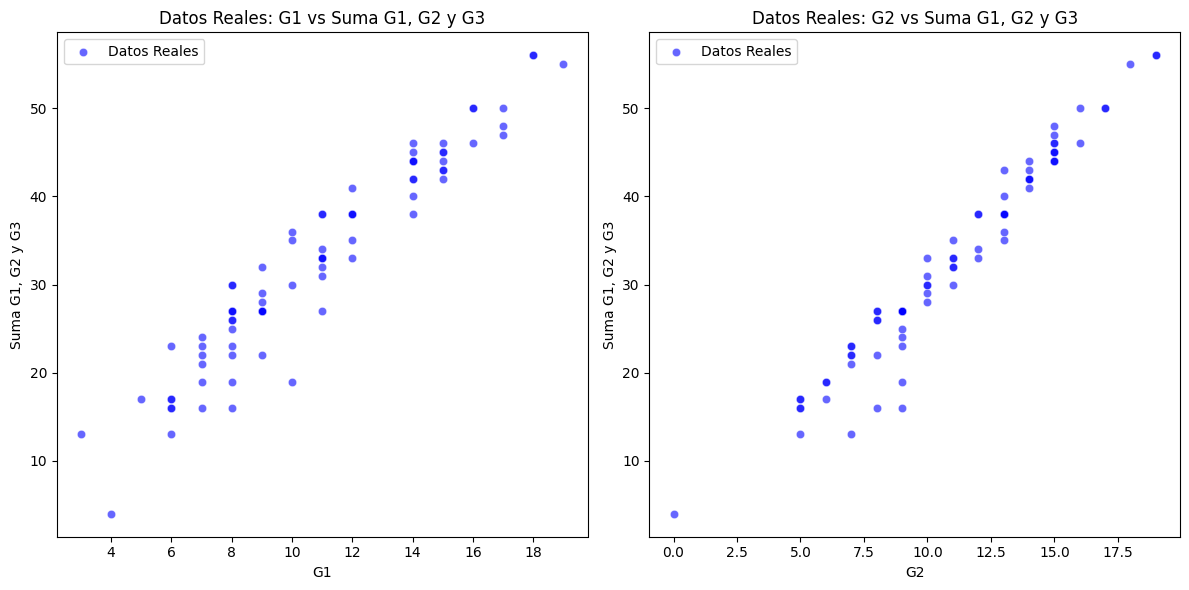

Error cuadrático medio: 4.2118674966017595
Coeficientes del modelo: [1.16313828 1.99318622]
Intersección del modelo: -2.037049284709017


In [32]:
# Definir la variable dependiente (Y)
Y = data_combined_cleaned['Suma_G1_G2_G3']  # La suma de G1, G2 y G3

# Definir las variables independientes (X)
X = data_combined_cleaned[['G1', 'G2']]  # Aquí se pueden agregar más columnas si es necesario

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfica para G1 vs Suma_G1_G2_G3
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['G1'], y=y_test, color='blue', label='Datos Reales', alpha=0.6)
plt.title('Datos Reales: G1 vs Suma G1, G2 y G3')
plt.xlabel('G1')
plt.ylabel('Suma G1, G2 y G3')
plt.legend()

# Gráfica para G2 vs Suma_G1_G2_G3
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['G2'], y=y_test, color='blue', label='Datos Reales', alpha=0.6)
plt.title('Datos Reales: G2 vs Suma G1, G2 y G3')
plt.xlabel('G2')
plt.ylabel('Suma G1, G2 y G3')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular el error cuadrático medio
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Mostrar coeficientes del modelo
print("Coeficientes del modelo:", lin_reg.coef_)
print("Intersección del modelo:", lin_reg.intercept_)



In [55]:
import pandas as pd

# Cargar el dataset desde un archivo CSV local
student_performance = pd.read_csv(r'C:\Users\analistaderiesgo1\Proyecto 1\Datos\Documentación\student\student-mat.csv',sep=';')

# Verificar el tipo de student_performance
print(type(student_performance))
print(student_performance.shape)  # Imprimir las dimensiones del DataFrame
print(student_performance.head())  # Ver las primeras filas del DataFrame


<class 'pandas.core.frame.DataFrame'>
(395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [50]:
print(student_performance.columns)


Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')


In [53]:
print(student_performance.columns.tolist())


['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3']


In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Cargar el dataset desde un archivo CSV local
student_performance = pd.read_csv(r'C:\Users\analistaderiesgo1\Proyecto 1\Datos\Documentación\student\student-mat.csv', sep=';')

# Verificar el tipo de student_performance
print(type(student_performance))
print(student_performance.shape)  # Imprimir las dimensiones del DataFrame
print(student_performance.head())  # Ver las primeras filas del DataFrame

# Imprime los nombres de las columnas
print("Nombres de las columnas en el DataFrame:")
print(student_performance.columns.tolist())

# Verificar y eliminar filas con valores nulos
print("Número de valores nulos por columna antes de la limpieza:")
print(student_performance.isnull().sum())

# Eliminar filas con valores nulos
student_performance_cleaned = student_performance.dropna()

# Verificar el número de filas después de la limpieza
print(f"Número de filas después de eliminar valores nulos: {student_performance_cleaned.shape[0]}")

# Ajusta la lista de columnas categóricas según los nombres impresos
# Asegúrate de usar los nombres correctos aquí
col_categoricas = ['sex', 'Mjob', 'Fjob']  # Cambia a los nombres correctos según los nombres del DataFrame

# Crea el encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Codifica las columnas categóricas
try:
    encoded_datos_categoricos = encoder.fit_transform(student_performance_cleaned[col_categoricas])

    # Convierte el resultado en un DataFrame y asigna nombres a las columnas
    encoded_df = pd.DataFrame(encoded_datos_categoricos, columns=encoder.get_feature_names_out(col_categoricas))

    # Muestra el DataFrame codificado
    print(encoded_df)
except KeyError as e:
    print(f"Error: {e}")



<class 'pandas.core.frame.DataFrame'>
(395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Nombres de las columnas en el DataFrame:

In [70]:
# Generamos una columna adicional de nombre 'aprobado' donde si se cumple la condición que la suma de las notas es mayor o igual a 40, se aprueba = 1 (True), no aprueba = 0 (False)
df_encoded_data['aprobado'] = (df_encoded_data['suma_g'] >= 40).astype(int)  # Utilizamos la función .astype(int) para convertir los valores booleanos en 1 y 0

# Mostrar el DataFrame con la nueva columna 'aprobado'
print("DataFrame con la nueva columna 'aprobado':")
print(df_encoded_data[['G1', 'G2', 'G3', 'suma_g', 'aprobado']].head())  # Muestra las primeras filas

# Contar el número de aprobados y no aprobados
print("Conteo de aprobados y no aprobados:")
print(df_encoded_data['aprobado'].value_counts())


DataFrame con la nueva columna 'aprobado':
   G1  G2  G3  suma_g  aprobado
0   5   6   6      17         0
1   5   5   6      16         0
2   7   8  10      25         0
3  15  14  15      44         1
4   6  10  10      26         0
Conteo de aprobados y no aprobados:
aprobado
0    292
1    103
Name: count, dtype: int64


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar los datos
student_performance = pd.read_csv(r'C:\Users\analistaderiesgo1\Proyecto 1\Datos\Documentación\student\student-mat.csv', sep=';')

# Suponiendo que ya has creado la columna 'aprobado'
student_performance['aprobado'] = (student_performance['G1'] + student_performance['G2'] + student_performance['G3'] > 40).astype(int)

# Convertir variables categóricas en variables dummy
df_encoded_data = pd.get_dummies(student_performance, drop_first=True)

# Separar características y variable objetivo
X = df_encoded_data.drop(columns=['G1', 'G2', 'G3', 'aprobado'])
y = df_encoded_data['aprobado']

# Dividir el DataFrame en 20% para testeo y 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Matriz de confusión y reporte de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))



Precisión del modelo: 0.7341772151898734
Matriz de confusión:
[[50  5]
 [16  8]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        55
           1       0.62      0.33      0.43        24

    accuracy                           0.73        79
   macro avg       0.69      0.62      0.63        79
weighted avg       0.71      0.73      0.71        79



In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Cargar el dataset desde un archivo CSV local
student_performance = pd.read_csv(r'C:\Users\analistaderiesgo1\Proyecto 1\Datos\Documentación\student\student-mat.csv', sep=';')

# Verificar el tipo de student_performance
print(type(student_performance))
print(student_performance.shape)  # Imprimir las dimensiones del DataFrame
print("Nombres de las columnas en el DataFrame:")
print(student_performance.columns.tolist())  # Imprimir los nombres de las columnas

# Verificar si las columnas G1, G2 y G3 existen
if 'G1' in student_performance.columns and 'G2' in student_performance.columns and 'G3' in student_performance.columns:
    print("Las columnas G1, G2 y G3 están presentes en el DataFrame.")
else:
    print("Error: No se encontraron las columnas G1, G2 o G3.")

# Convertir las columnas G1, G2 y G3 a tipo numérico
student_performance['G1'] = pd.to_numeric(student_performance['G1'], errors='coerce')
student_performance['G2'] = pd.to_numeric(student_performance['G2'], errors='coerce')
student_performance['G3'] = pd.to_numeric(student_performance['G3'], errors='coerce')

# Verificar los tipos de datos de las columnas
print("Tipos de datos de las columnas:")
print(student_performance.dtypes)

# Verificar y eliminar filas con valores nulos
print("Número de valores nulos por columna antes de la limpieza:")
print(student_performance.isnull().sum())

# Eliminar filas con valores nulos
student_performance_cleaned = student_performance.dropna()

# Verificar el número de filas después de la limpieza
print(f"Número de filas después de eliminar valores nulos: {student_performance_cleaned.shape[0]}")

# Sumar las columnas G1, G2 y G3 y crear una nueva columna llamada 'suma_g'
student_performance_cleaned['suma_g'] = student_performance_cleaned['G1'] + student_performance_cleaned['G2'] + student_performance_cleaned['G3']

# Mostrar el DataFrame con la nueva columna de suma
print("DataFrame con la nueva columna 'suma_g':")
print(student_performance_cleaned[['G1', 'G2', 'G3', 'suma_g']].head())  # Muestra las primeras filas

# Ajusta la lista de columnas categóricas según los nombres impresos
col_categoricas = ['sex', 'Mjob', 'Fjob']  # Cambia a los nombres correctos según los nombres del DataFrame

# Crea el encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Codifica las columnas categóricas
try:
    encoded_datos_categoricos = encoder.fit_transform(student_performance_cleaned[col_categoricas])

    # Convierte el resultado en un DataFrame y asigna nombres a las columnas
    encoded_df = pd.DataFrame(encoded_datos_categoricos, columns=encoder.get_feature_names_out(col_categoricas))

    # Agregar el DataFrame codificado a los datos originales limpios
    df_encoded_data = pd.concat([student_performance_cleaned.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

    # Generamos una columna adicional de nombre 'aprobado' donde si se cumple la condición de que el puntaje del estudiante es mayor o igual a 40, se aprueba = 1, No aprueba = 0
    df_encoded_data['aprobado'] = (df_encoded_data['G1'] + df_encoded_data['G2'] + df_encoded_data['G3'] >= 40).astype(int)

    # Mostrar el DataFrame final
    print("DataFrame final:")
    print(df_encoded_data)

    # Contar el número de aprobados y no aprobados
    print("Conteo de aprobados y no aprobados:")
    print(df_encoded_data['aprobado'].value_counts())
except KeyError as e:
    print(f"Error: {e}")





<class 'pandas.core.frame.DataFrame'>
(395, 33)
Nombres de las columnas en el DataFrame:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Las columnas G1, G2 y G3 están presentes en el DataFrame.
Tipos de datos de las columnas:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel    

REVISAR LUEGO......

In [8]:
#1. Modelo de regresión logística para determinar si un estudiante pasa con una nota superior a 40


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definir el objetivo (si el estudiante pasa o no, usando G3 > 3)
y = (student_performance.data.targets['G3'] > 3).astype(int)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicción
y_pred = log_reg.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Precisión del modelo: 97.69%


In [9]:
print(type(student_performance))


<class 'ucimlrepo.dotdict.dotdict'>


In [10]:
print(student_performance.columns)


None


In [11]:
# Asegúrate de que student_performance es un DataFrame
if isinstance(student_performance, pd.DataFrame):
    # Extraer G1, G2 y G3
    Y = student_performance[['G1', 'G2', 'G3']]
else:
    print("student_performance no es un DataFrame.")


student_performance no es un DataFrame.


In [29]:
print("Valores únicos en y:", y.unique())
print("Valores únicos en y_pass:", y_pass.unique())



Valores únicos en y: [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
Valores únicos en y_pass: [0]


In [38]:
# 3. Regresión logística para determinar si un estudiante pasa con una nota superior a 40

import numpy as np
import pandas as pd  # Asegúrate de importar pandas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear la columna de notas (Y) que contiene G3
y = student_performance.data.targets['G3']

# Imprimir los valores únicos de Y para asegurarse de que están correctos
print("Valores únicos en y:", y.unique())
print("Resumen de G3:", y.describe())

# Definir la nueva variable 'y_pass' con el umbral ajustado a 10
y_pass = (y > 10).astype(int)  # Los estudiantes aprueban si tienen una nota mayor a 10

# Crear una nueva columna en X_encoded para identificar si la nota está entre G1, G2 y G3
mask = y.isin([11, 12, 13])  # Ajusta los valores según lo que consideres relevante
X_encoded['Notas_11_13'] = np.where(mask, 1, 0)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_pass, test_size=0.2, random_state=42)

# Modelo de regresión logística
log_reg = LogisticRegression(max_iter=500)  # Aumentar el número de iteraciones para mejorar la convergencia
log_reg.fit(X_train, y_train)

# Predicción
y_pred = log_reg.predict(X_test)

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Valores únicos en y: [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
Resumen de G3: count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
Precisión del modelo: 86.15%
